In [1]:
import pandas as pd

# Constructing our matrix of frequented Regions by strain

In [58]:
rawDf = pd.read_csv("../../data/100YeastGenomesCombinedHardMasked.gtet300bps.k300.graph.dot-100YeastGenomesCombinedHardMasked.gtet300bps.fna-a0.8-kp0-sup5-sz1.bed", delimiter="\t", header=None)
#rawDf = rawDf[[0,3]]

In [59]:
rawDf.shape

(11273908, 10)

In [60]:
seqText = rawDf[0].values

In [61]:
textSplitLen = [len(text.split()) for text in seqText]

In [ ]:
textSplit = [text.split() for text in seqText]

In [ ]:
strain = []
for text in textSplit:
    if len(text) == 1:
        strain.append(text[0].split(".")[0])
    else:
        #strain.append(text[text.index("cerevisiae") + 1])
        strainName = text[text.index("cerevisiae") + 1]
        strain.append(strainName.split("-")[0])

In [ ]:
strainLower = [text.lower() for text in strain]

In [ ]:
frNums = [int(text.split("-")[1]) for text in rawDf[3].values]

In [ ]:
df = pd.DataFrame({"Strain": strainLower, "FrNum": frNums})

In [ ]:
len(set(frNums))

In [53]:
dfMeow = df.groupby(df.columns.tolist(),as_index=False).size().reset_index(name = 'counts')

In [54]:
dfPivot = dfMeow.pivot(index = "Strain", columns = "FrNum", values="counts").fillna(0)


In [55]:
dfPivot.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5220, 5221, 5222, 5223, 5224, 5225, 5226, 5227, 5228, 5229],
           dtype='int64', name='FrNum', length=5230)

In [56]:
dfPivot.head()

FrNum,0,1,2,3,4,5,6,7,8,9,...,5220,5221,5222,5223,5224,5225,5226,5227,5228,5229
Strain,,,,,,,,,,,,,,,,,,,,,
m22,22.0,21.0,20.0,20.0,20.0,19.0,19.0,22.0,18.0,21.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
rm11,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
s288c,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
sigma1278b,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
sk1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


## Read in top FRs

In [5]:
top1000 = pd.read_csv("../../data/100YeastGenomesCombinedHardMasked.gtet300bps.k300.graph.dot-100YeastGenomesCombinedHardMasked.gtet300bps.fna-a0.8-kp0-sup5-sz1-limit1000.topfrs.txt", header = None)
top1000int = [int(top) for top in top1000[0].values]

In [6]:
top200 = pd.read_csv("../../data/100YeastGenomesCombinedHardMasked.gtet300bps.k300.graph.dot-100YeastGenomesCombinedHardMasked.gtet300bps.fna-a0.8-kp0-sup5-sz1-limit200.topfrs.txt", header = None)
top200int = [int(top) for top in top200[0].values]

## Exploratory Data Analysis

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(dfPivot)

NameError: name 'dfPivot' is not defined

In [21]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dfPivot)
print(pca.explained_variance_ratio_)
print(pca.components_)
X = dfPivot
X_pca = pca.transform(dfPivot)
#X_new = pca.inverse_transform(X_pca)
#plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=y_pred)
plt.axis('equal');
plt.hist(pca.components_[0])

## Load frdf and origin data and cluster on 1000 FRs

In [4]:
import pickle
import pandas as pd

In [31]:
file = open("frDf.pkl",'rb')
frdf = pickle.load(file)
frdf.reset_index(inplace=True)
frdf.rename(index=str, columns={'Strain': 'strain'}, inplace=True)
file.close()

origins = pd.read_csv('origins.csv')

In [33]:
origins['strain'] = [x.lower() for x in origins['strain']]

In [34]:
frdf200 = frdf[top200int]
frdf1000 = frdf[top1000int]

In [40]:
data = origins.join(frdf200, on='strain' , how='outer')

In [11]:
# data['combined'] = [x if x in ['Mosaic', 'Wine/European'] else 'Other' for x in data['Origin60']]

In [12]:
#y = data['Origin60']
data = frdf200
n_clusters = 5
X = data[[x for x in data.columns if x not in ['Origin60', 'strain']]]

In [24]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

names = ["K-Means", "Agglomerative"]
models = [
    KMeans(n_clusters=n_clusters, random_state=0).fit(X),
    AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    ]

In [19]:
predictions = pd.DataFrame({'strain': data.index.values})
for name, model in zip(names, models):
    predictions_this_model = model.labels_
    predictions[name+'predictions'] = predictions_this_model
    print('The model {} has performance {}'.format(name,'blah'))

The model K-Means has performance blah
The model DBSCAN has performance blah
The model Agglomerative has performance blah


In [151]:
predictions.head()

,strain,K-Meanspredictions,DBSCANpredictions,Agglomerativepredictions
0,m22,4,0,2
1,rm11,4,0,2
2,s288c,4,0,2
3,sigma1278b,4,0,2
4,sk1,4,0,2


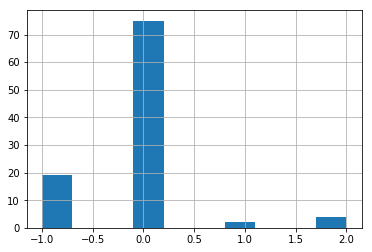

In [152]:
predictions['DBSCANpredictions'].hist()

In [25]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
normalized_mutual_info_score(y, data['predictions'])

NameError: name 'y' is not defined

In [158]:
X.shape

(98, 200)

[ 0.61035079  0.1678951   0.05383448  0.04084667  0.0260698 ]


(array([  20.,    7.,    1.,    0.,   17.,    4.,    7.,   12.,   24.,  108.]),
 array([-0.00514343,  0.00418179,  0.013507  ,  0.02283221,  0.03215743,
         0.04148264,  0.05080786,  0.06013307,  0.06945828,  0.0787835 ,
         0.08810871]),
 <a list of 10 Patch objects>)

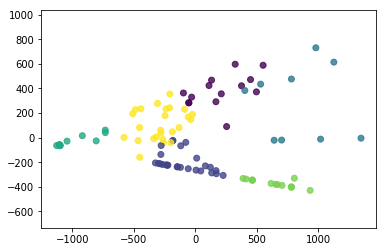

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(X)
#X_new = pca.inverse_transform(X_pca)
#plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=data['predictions'])
plt.axis('equal');
plt.hist(pca.components_[0])

In [138]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
numeric_origins = le.transform(y)

(array([  20.,    7.,    1.,    0.,   17.,    4.,    7.,   12.,   24.,  108.]),
 array([-0.00514343,  0.00418179,  0.013507  ,  0.02283221,  0.03215743,
         0.04148264,  0.05080786,  0.06013307,  0.06945828,  0.0787835 ,
         0.08810871]),
 <a list of 10 Patch objects>)

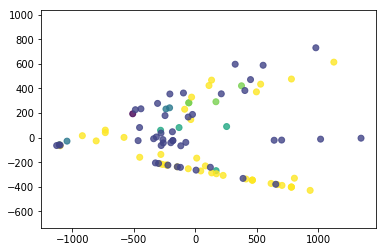

In [139]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=numeric_origins)
plt.axis('equal');
plt.hist(pca.components_[0])

In [140]:
from sklearn import metrics
metrics.silhouette_score(X, data['predictions'], metric='euclidean')

0.28819189759898572

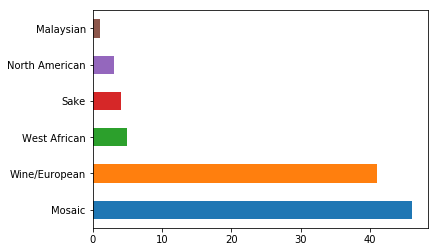

In [159]:
origins['Origin60'].value_counts().plot(kind='barh')

In [162]:
X.transpose().describe()

,yjm1434,yjm1273,yps163,yjm1447,yjm195,yjm1248,yjm1439,yjm627,sk1,yjm1388,...,yjm1549,yjm1311,yjm693,yjm1199,yjm1338,yjm1527,yjm1399,yjm1326,sigma1278b,s288c
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,57.310000,59.215000,4.930000,38.88000,82.865000,69.685000,97.360000,69.52500,1.530000,86.680000,...,104.470000,60.030000,92.595000,60.155000,55.085000,100.760000,56.68000,59.060000,1.905000,1.305000
std,43.560435,45.008305,8.009109,31.49644,55.033355,48.476236,67.727435,48.36367,1.164422,37.926901,...,83.743501,46.121307,79.806304,25.830934,23.654289,43.264553,35.87664,31.904323,2.222764,1.023333
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,...,0.000000,0.000000,0.000000,71.000000,65.000000,119.000000,0.00000,76.000000,0.000000,0.000000
50%,90.000000,93.000000,0.000000,64.00000,119.000000,103.000000,144.000000,103.00000,2.000000,103.000000,...,171.000000,95.000000,161.000000,71.000000,65.000000,119.000000,79.00000,76.000000,0.000000,2.000000
75%,90.000000,93.000000,11.000000,64.00000,119.000000,103.000000,144.000000,103.00000,2.000000,103.000000,...,171.000000,95.000000,161.000000,71.000000,65.000000,119.000000,79.00000,76.000000,4.000000,2.000000
max,91.000000,94.000000,24.000000,65.00000,120.000000,104.000000,145.000000,103.00000,3.000000,104.000000,...,172.000000,97.000000,162.000000,72.000000,66.000000,120.000000,80.00000,77.000000,5.000000,3.000000


In [163]:
frdf.transpose().describe()

Strain,m22,rm11,s288c,sigma1278b,sk1,yjm1078,yjm1083,yjm1129,yjm1133,yjm1190,...,yjm972,yjm975,yjm978,yjm981,yjm984,yjm987,yjm990,yjm993,yjm996,yps163
count,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,...,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000,137902.000000
mean,0.403547,0.275739,0.404570,0.404505,0.393693,0.542458,0.740134,1.138497,0.744137,1.017353,...,1.110695,0.759329,0.898428,1.087142,1.161695,1.114139,0.848690,0.887413,0.997411,0.297726
std,3.033539,0.490399,0.508545,0.539960,0.502530,2.027202,5.514050,10.475123,5.219142,9.236916,...,9.893880,4.625548,6.729848,9.498141,10.685181,9.894012,6.072113,6.532404,8.245589,2.119273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,50.000000,6.000000,6.000000,6.000000,7.000000,33.000000,87.000000,161.000000,80.000000,141.000000,...,151.000000,71.000000,103.000000,145.000000,163.000000,151.000000,93.000000,100.000000,126.000000,43.000000
